In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
df = data.copy()

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df = df.drop(['CustomerID','Gender','Age'], axis=1)

In [7]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Data Analysis

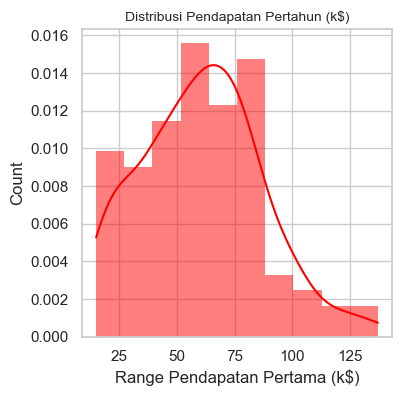

In [10]:
# cek distribusi kolom Annual Income
plt.figure(figsize=(4,4))
sns.set(style = 'whitegrid')
sns.histplot(df['Annual Income (k$)'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi Pendapatan Pertahun (k$)', fontsize=10)
plt.xlabel('Range Pendapatan Pertama (k$)')
plt.ylabel('Count')
plt.show()

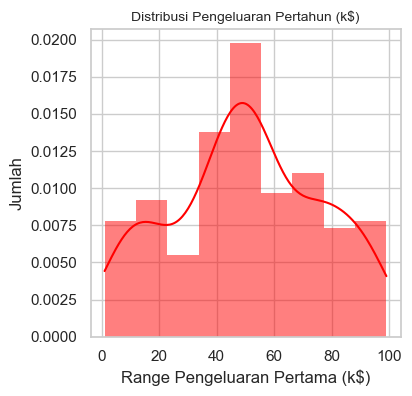

In [12]:
# cek distribusi kolom Annual Income
plt.figure(figsize=(4,4))
sns.set(style = 'whitegrid')
sns.histplot(df['Spending Score (1-100)'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi Pengeluaran Pertahun (k$)', fontsize=10)
plt.xlabel('Range Pengeluaran Pertama (k$)')
plt.ylabel('Jumlah')S
plt.show()

# CLUSTERING

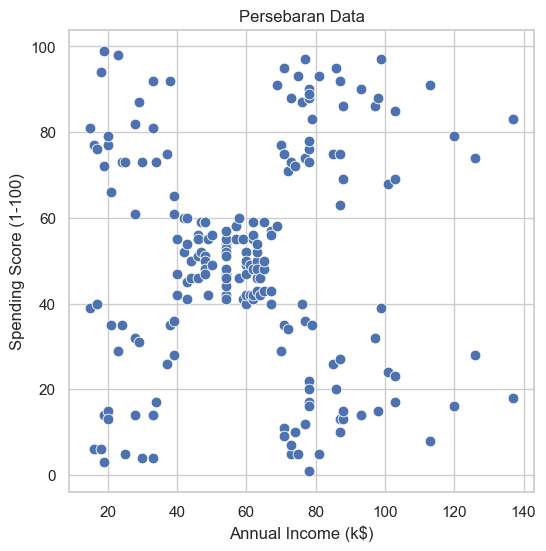

In [13]:
# Persebaran Data
plt.figure(figsize=(6,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data = df, s=60)
plt.title('Persebaran Data')
plt.show()

In [16]:
# Menentukan Cluster Terbaik (Elbow Method)
# hitung within cluster sum of squared error (WCSS) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10) #n_init adalah jumlah berapa kali k-means algorithm dirun dengan centroid berbeda
    kmModel.fit(df)
    wcss.append(kmModel.inertia_)

D:\Aplikasi\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Aplikasi\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Aplikasi\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Aplikasi\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

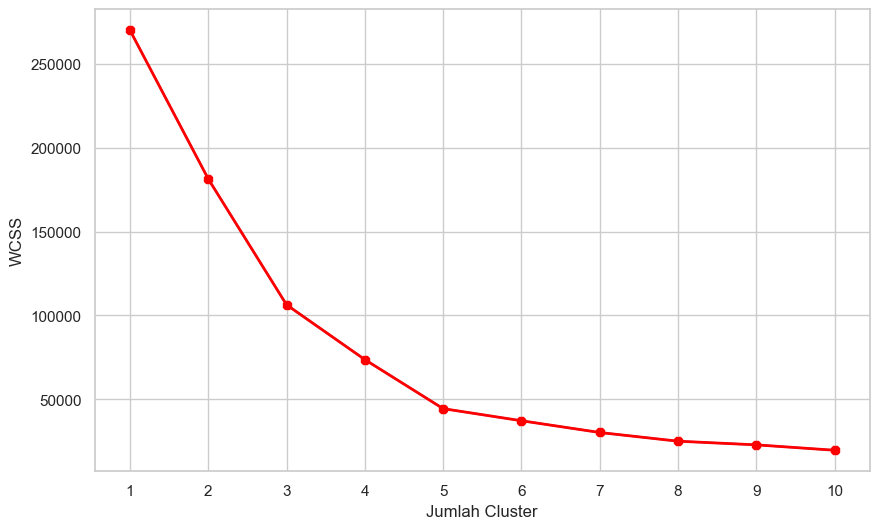

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('Jumlah Cluster')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

In [20]:
# Model Dengan 5 Cluster
kmModelFix= KMeans(n_clusters=5, n_init=10)
kmModelFix.fit(df)

#Memprediksi Label
hasil_prediksi = kmModelFix.predict(df)
print(hasil_prediksi)

D:\Aplikasi\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [24]:
df ['Label'] = hasil_prediksi # ubah jadi hasil_cluster
df.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


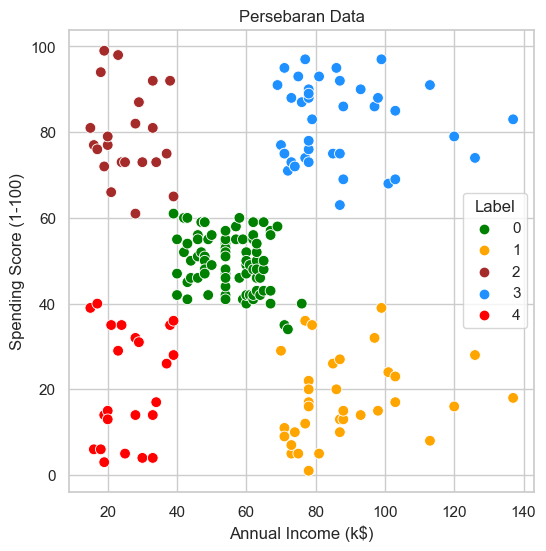

In [29]:
# Persebaran data beserta Labelnya
plt.figure(figsize=(6,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Label',
               palette=['green','orange','brown','dodgerblue','red'], legend='full',
               data = df, s = 60)
plt.title('Persebaran Data')
plt.show()

## KESIMPULAN
